In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

plt.style.use("ggplot")

c:\Users\giova\anaconda3\envs\dlgs\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
def get_results(filename, rolling_mean = False, window = 10, num_agents=8, visualize = False):
    with open(filename, "r") as f:
        log = json.load(f)
         
        policy = log["policy"]
        episodes = log["episodes"]

        episodes_mean_reward = []
        episodes_max_reward = []
        episodes_min_reward = []
        episodes_mean_steps = []

        for i in range(0,len(episodes),num_agents):
            ep_rewards = [episodes[j][1]["episode_reward"] for j in range(i,i+num_agents)]
            episodes_mean_reward.append(np.mean(ep_rewards))
            episodes_max_reward.append(np.max(ep_rewards))
            episodes_min_reward.append(np.min(ep_rewards))
            episodes_mean_steps.append(np.mean([episodes[j][2]["episode_steps"] for j in range(i,i+num_agents)]))

        if rolling_mean:
            episodes_mean_reward = pd.DataFrame(episodes_mean_reward).rolling(window).mean()
            episodes_max_reward = pd.DataFrame(episodes_max_reward).rolling(window).mean()
            episodes_min_reward = pd.DataFrame(episodes_min_reward).rolling(window).mean()
            episodes_mean_steps = pd.DataFrame(episodes_mean_steps).rolling(window).mean()
            policy = pd.DataFrame(policy).rolling(window).mean()

        if visualize:
            _,axs = plt.subplots(3,1, figsize = (24,24))

            axs[0].plot(policy)
            axs[0].set_title("Policy Loss")
            axs[0].set_ylabel("Loss")
            axs[0].set_xlabel("Epochs")
        
            axs[1].plot(episodes_mean_steps)
            axs[1].set_ylabel("Mean Steps")
            axs[1].set_xlabel("Episodes")
            axs[1].set_title("Episode mean steps")

            axs[2].plot(episodes_mean_reward)
            axs[2].set_ylabel("Mean Reward")
            axs[2].set_xlabel("Episode")
            axs[2].set_title("Episode mean reward")
            # axs[2].set_ylim(bottom=-3)

            

        return policy, episodes_mean_reward, episodes_mean_steps, episodes_max_reward, episodes_min_reward

def compare_results(f1,f2,label1, label2, rolling = False):

    policy1, episodes_mean_reward1, episodes_mean_steps1, episodes_max_reward1, episodes_min_reward1  = get_results(f1, visualize=False, rolling_mean=rolling, window=25)
    policy2, episodes_mean_reward2, episodes_mean_steps2, episodes_max_reward2, episodes_min_reward2  = get_results(f2, visualize=False, rolling_mean=rolling, window=25)


    

    fig, axs = plt.subplots(3,1, figsize = (24,24))

    axs[0].plot(policy1, label = label1)
    axs[0].plot(policy2, label = label2)
    axs[0].set_title("Policy Loss")
    axs[0].set_ylabel("Loss")
    axs[0].set_xlabel("Epochs")

    axs[1].plot(episodes_mean_steps1,label = label1)
    axs[1].plot(episodes_mean_steps2,label = label2)
    axs[1].set_ylabel("Mean Steps")
    axs[1].set_xlabel("Episodes")   
    axs[1].set_title("Episode mean steps")

    axs[2].plot(episodes_mean_reward1, label = label1)
    # axs[2].plot(episodes_max_reward1, label = label1)
    # axs[2].plot(episodes_min_reward1, label = label1)


    axs[2].plot(episodes_mean_reward2, label = label2)
    # axs[2].plot(episodes_max_reward2, label = label2)
    # axs[2].plot(episodes_min_reward2, label = label2)

    axs[2].set_ylabel("Reward")
    axs[2].set_xlabel("Episode")
    axs[2].set_title("Episode mean reward")

    fig.legend([label1,label2], loc="lower center")

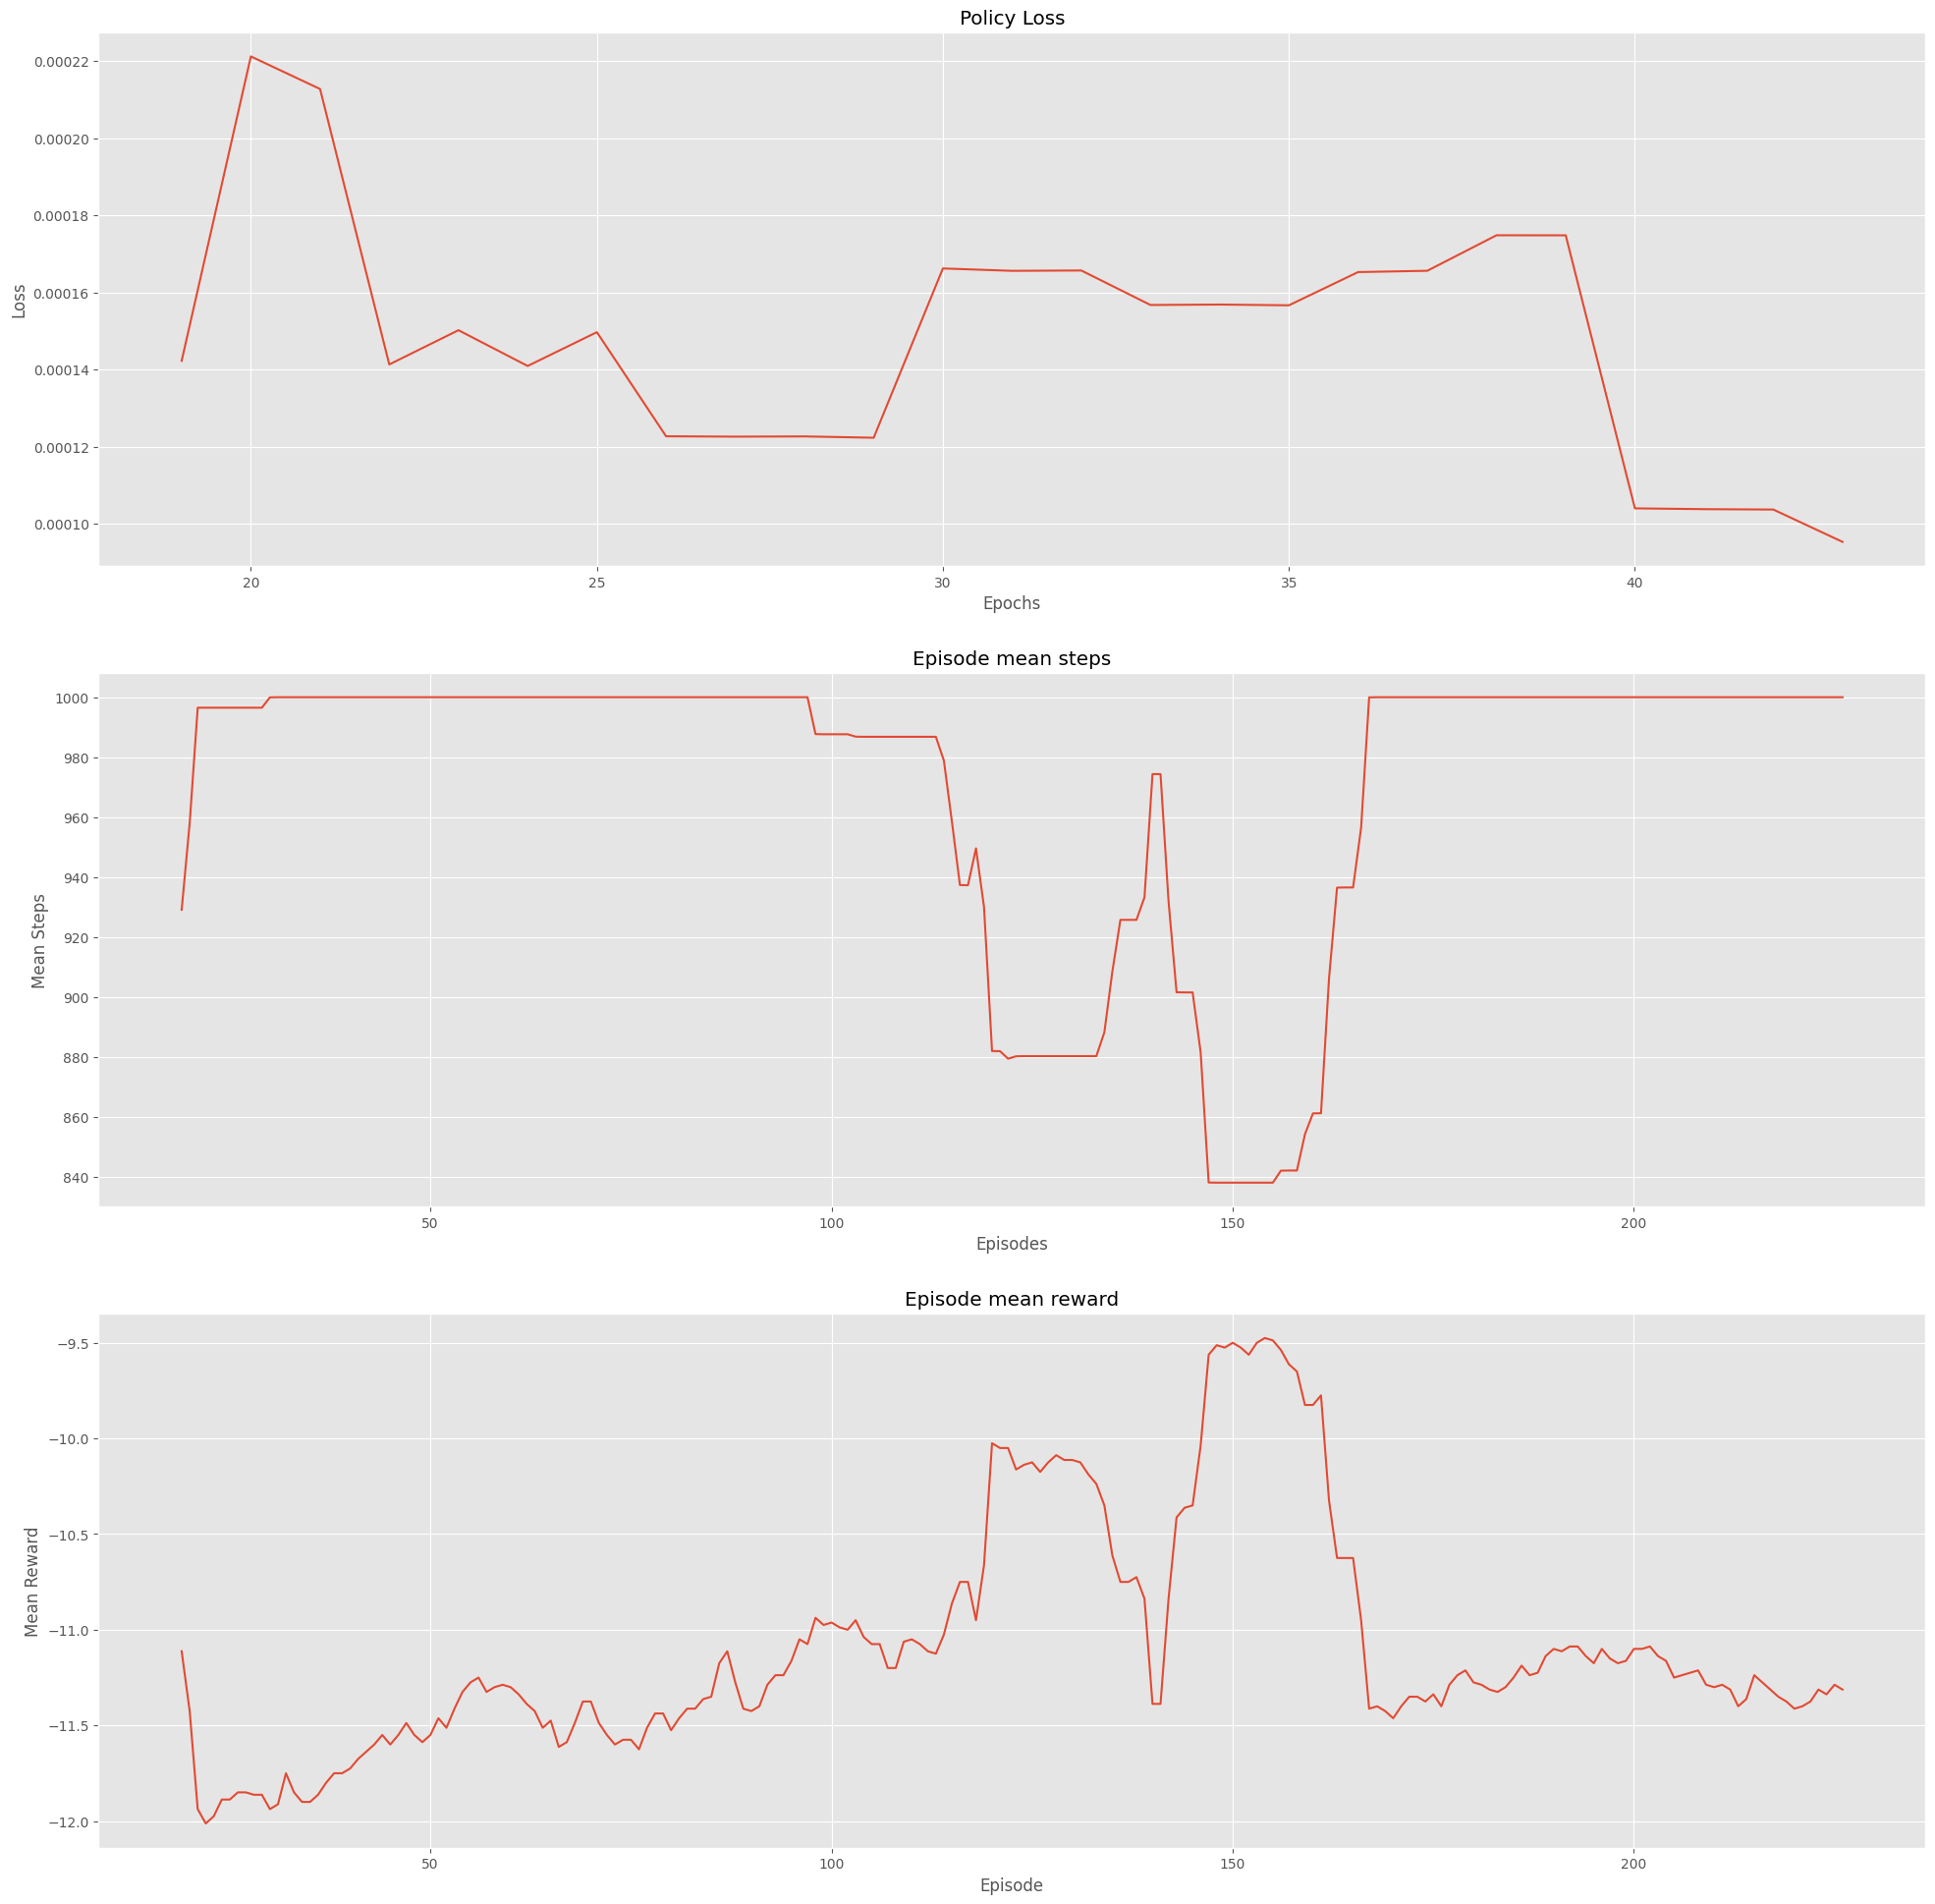

In [39]:
_ = get_results("results/MULTIAGENT_DISCRETE_4agent_ale_rewards/FirstRun/log.json", visualize=True, rolling_mean=True, window=20, num_agents=4)

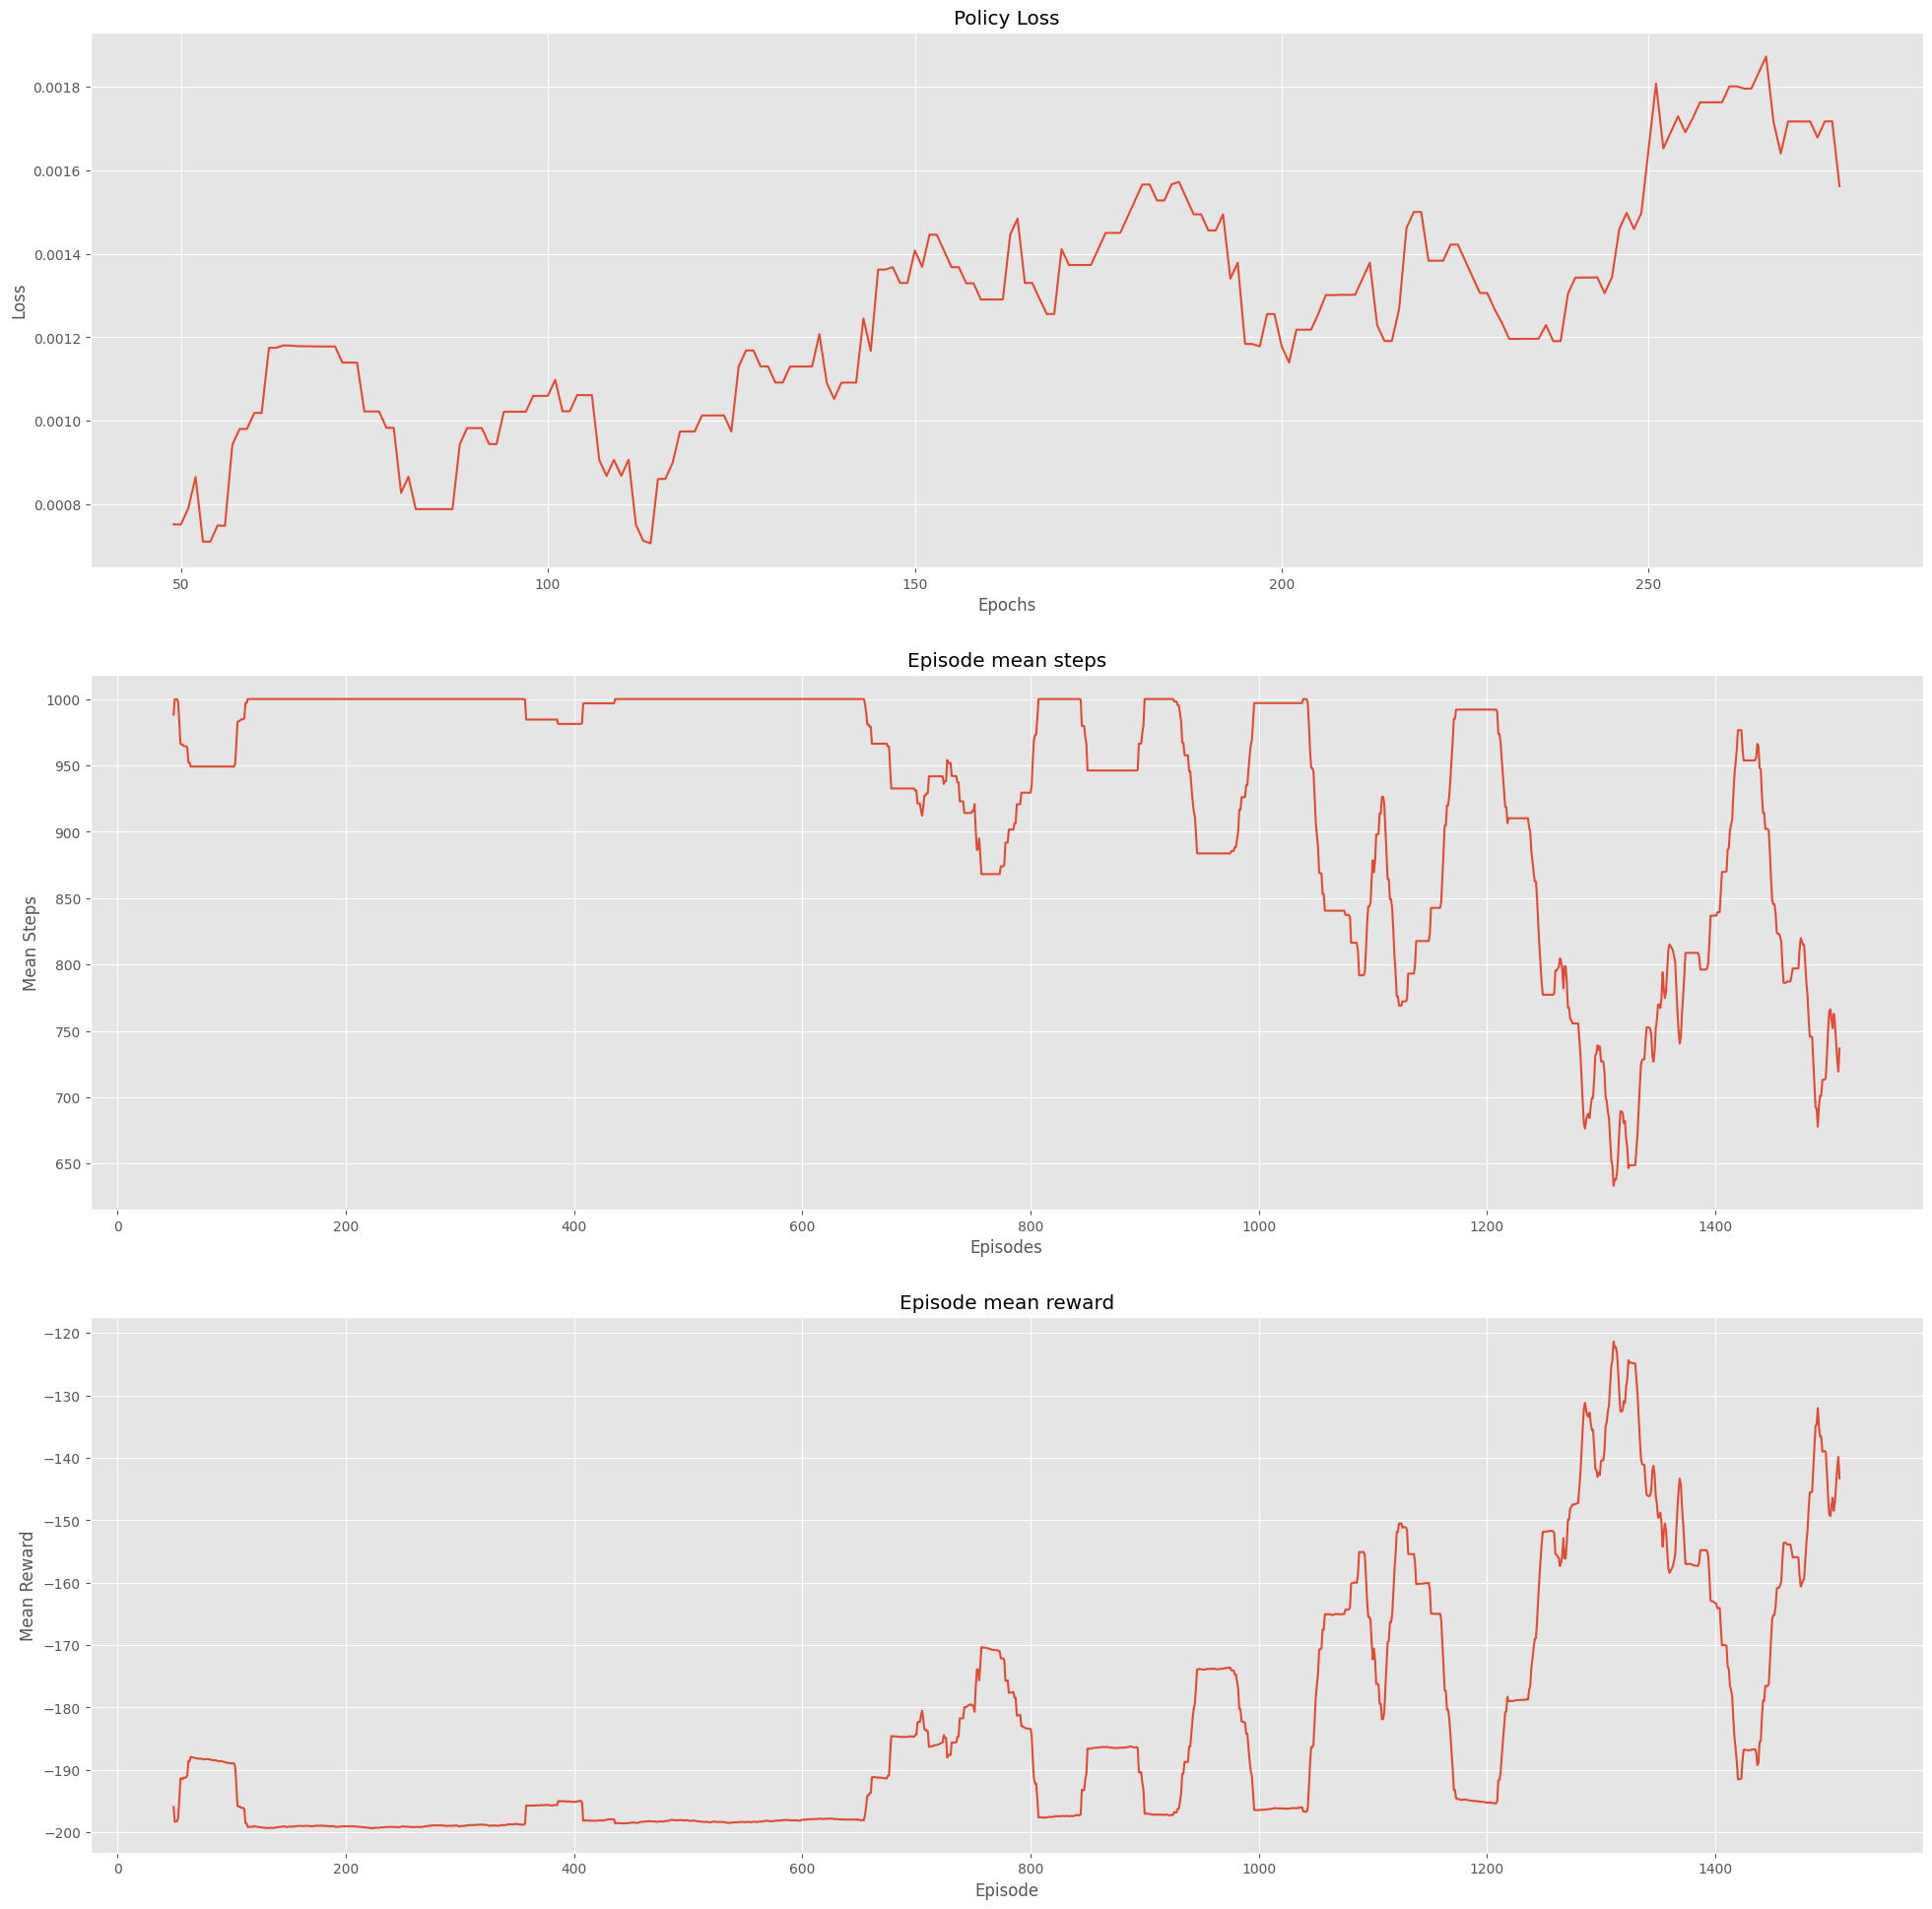

In [40]:
_ = get_results("results/MULTIAGENT_DISCRETE_4agent_random_lessobs/FirstRun/log.json", visualize=True, rolling_mean=True, window=50, num_agents=4)

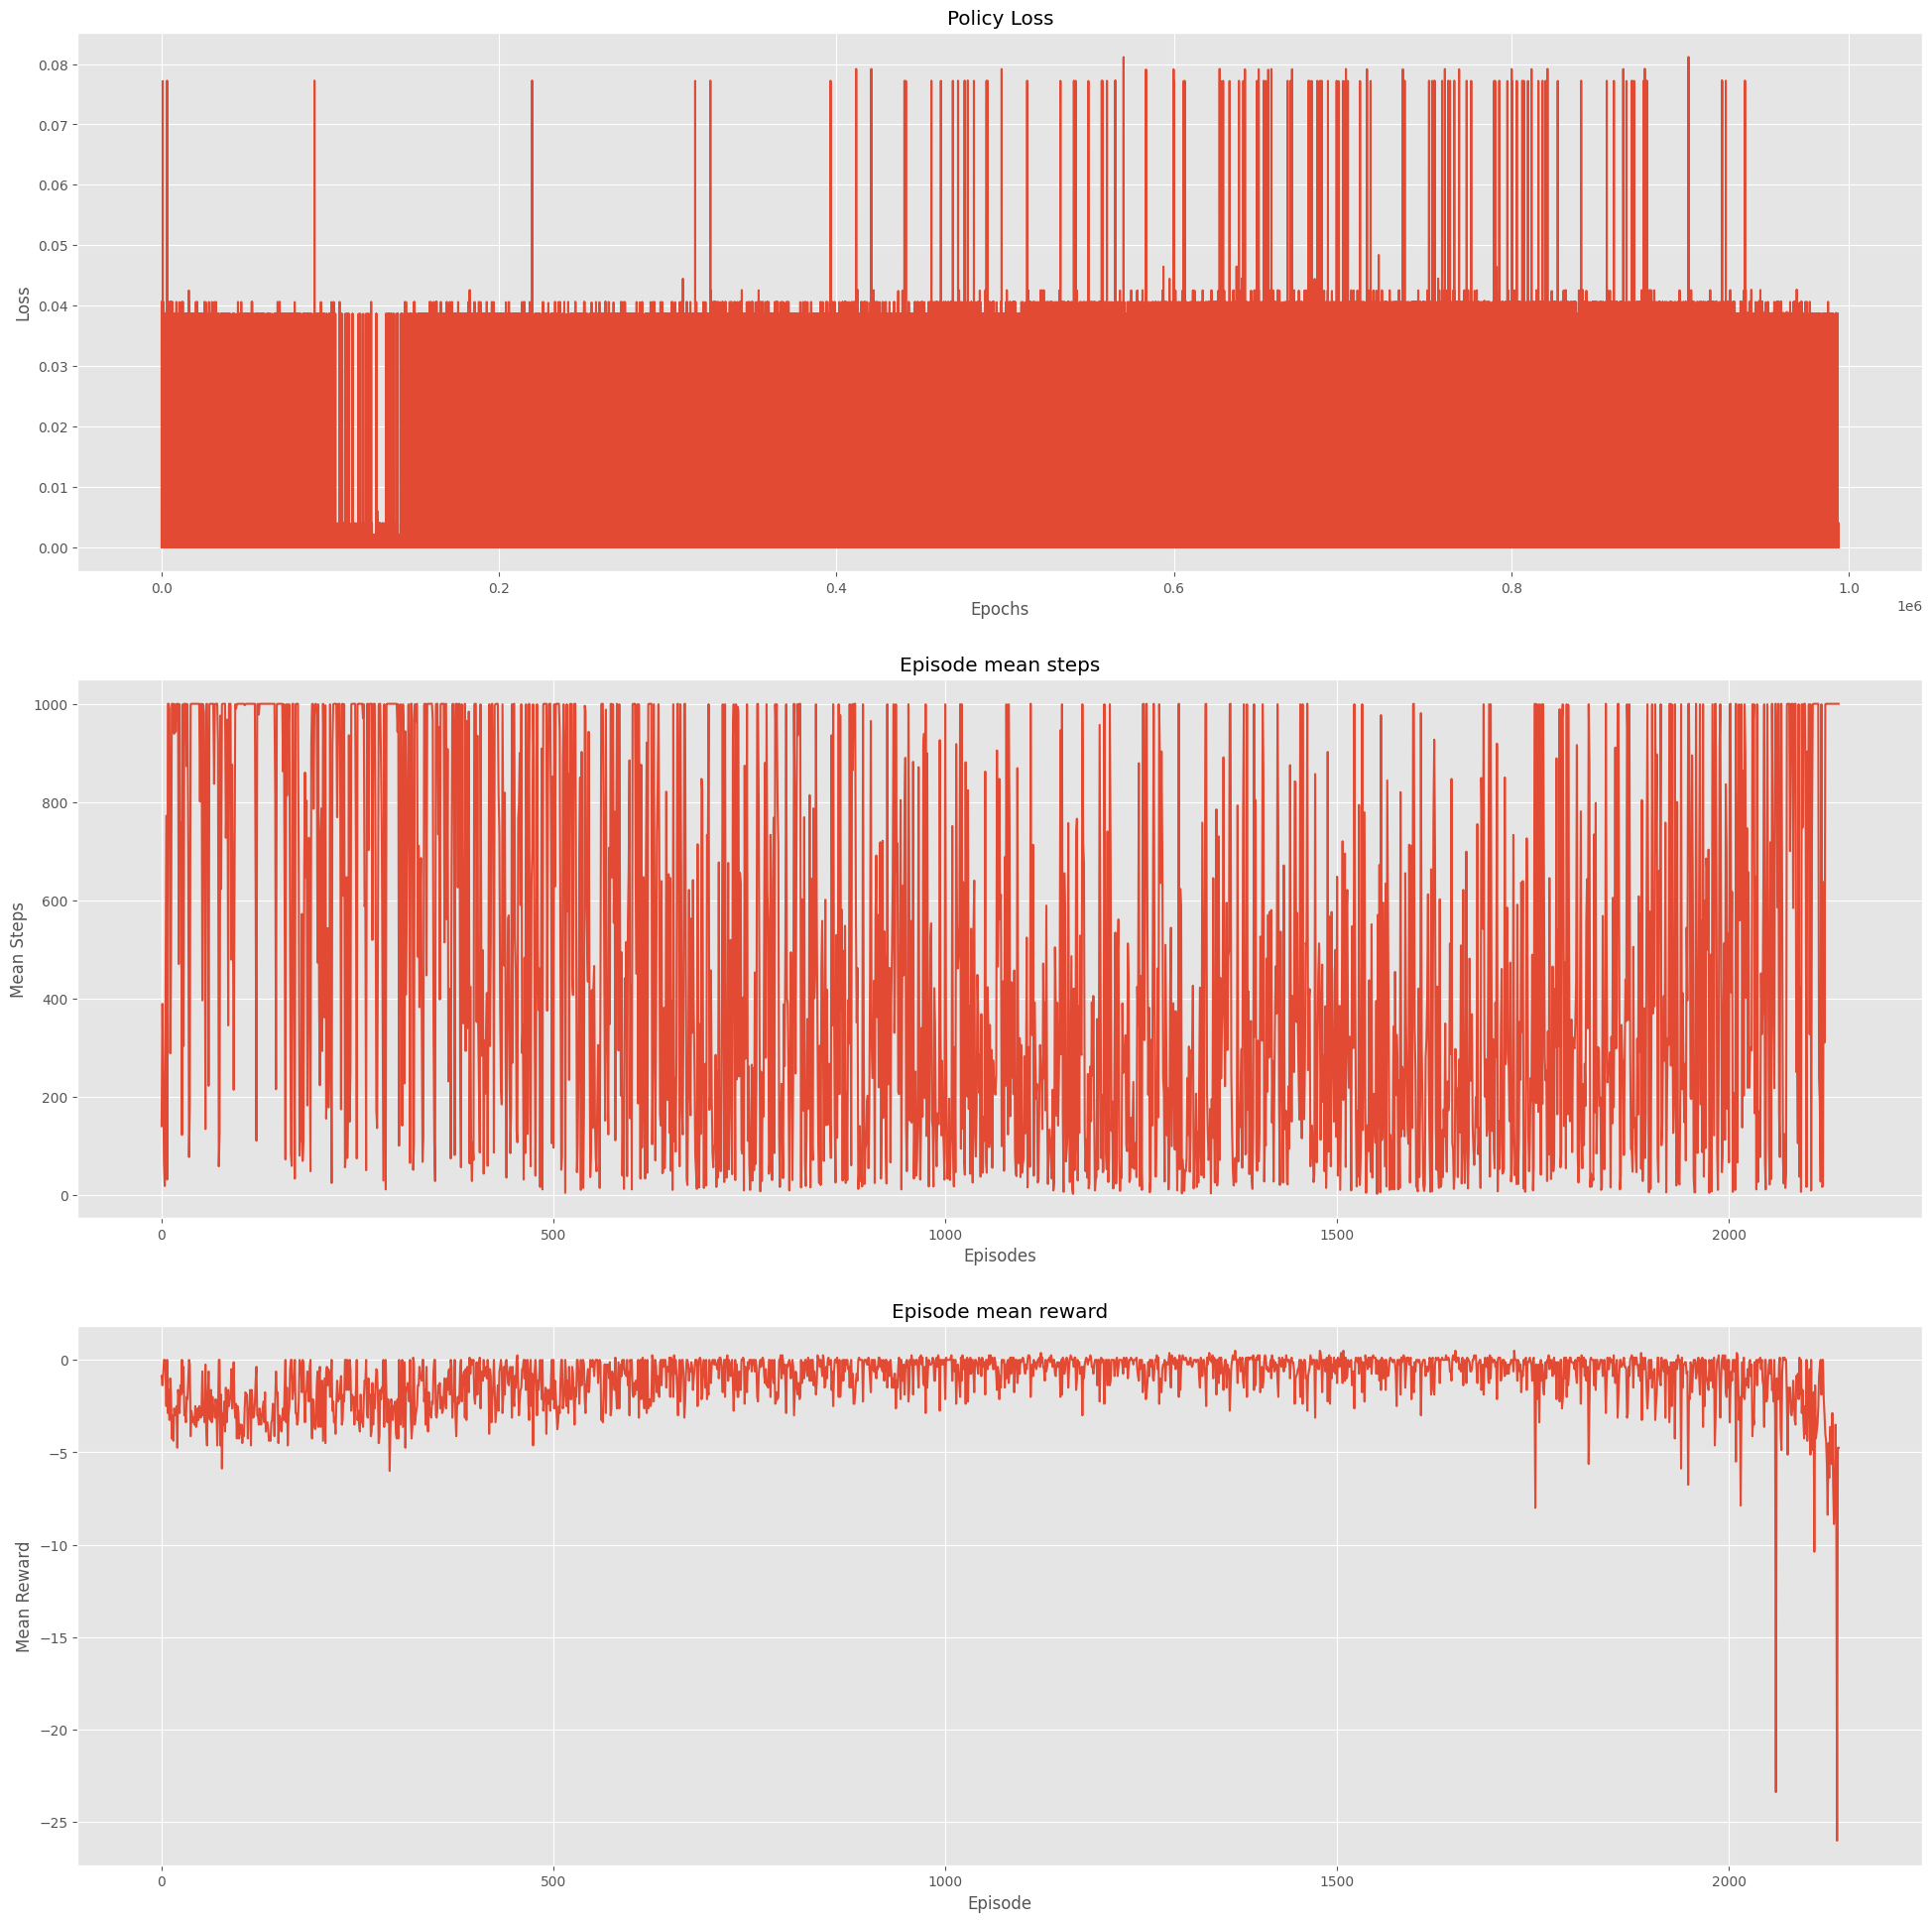

In [41]:
_ = get_results("results/MULTIAGENT_DISCRETE_8agent_random/FirstRun/log.json", visualize=True, rolling_mean=False, window=50, num_agents=8)